# PCA and clustering 15/11/2020

previously the pca worked but it was required that every 10 seconds there needs to be a decision made on the threshold of detection. this was done manually and definitely will not work in a real system. a way to automatically decide on the threshold might be using clustering. clustering can separate the input data points into clusters, and one can be voids and the other can be backgorund noise. 


In [3]:
import numpy as np 
import librosa 
import librosa.display
import noisereduce
from scipy import signal
from tools import split_audio
train_audio = './data/youtube/wav/7_3mins.wav'
switch_sound= './data/youtube/wav/7_switch_sound2.wav'
sr = 22050
x = np.array(librosa.load(train_audio,sr = None)[0][120*sr:130*sr])
y = np.array(librosa.load(switch_sound, sr= None)[0])
total_time = len(x)/22050

noise = np.array(librosa.load('./data/youtube/wav/7_operating_noise.wav',sr = 22050)[0])
#x= noisereduce.reduce_noise(x,noise)
#y= noisereduce.reduce_noise(y,noise)
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


c:\users\andy cai\appdata\local\programs\python\python36\lib\site-packages\noisereduce\noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Now we split the data into 10ms bins and standardise the audio data by using the Standard scaler. 

c:\users\andy cai\appdata\local\programs\python\python36\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=128 is too small for input signal of length=110
  n_fft, y.shape[-1]
c:\users\andy cai\appdata\local\programs\python\python36\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=128 is too small for input signal of length=111
  n_fft, y.shape[-1]


success, 1999 samples have been generated
success, 222 samples have been generated
success, 120 samples have been generated


c:\users\andy cai\appdata\local\programs\python\python36\lib\site-packages\librosa\core\spectrum.py:1545: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  "power_to_db was called on complex input so phase "


(16,)
1999


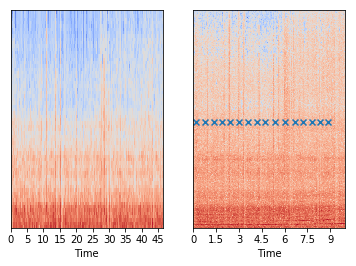

In [4]:
sr =22050
mydur = 0.005
mybins =128
win_len= mybins*2
mynr = False
x_frames,x_ft = split_audio(x,dur=mydur,fft_bins=mybins,nr=mynr,noisy_part= noise, window_len = win_len)
y_frames,y_ft = split_audio(y,dur=mydur,fft_bins=mybins, nr=mynr,noisy_part= noise,window_len = win_len)
noise_frames,noise_ft = split_audio(noise,dur=mydur,fft_bins=mybins,window_len = win_len)

#x_ft = librosa.stft(x).T
#y_ft = librosa.stft(y).T
#plt.figure(figsize=(14,5))

fig, axs = plt.subplots(1,2)

librosa.display.specshow(librosa.power_to_db(librosa.stft(x)),sr=sr,x_axis='time',ax=axs[1])

librosa.display.specshow(librosa.power_to_db(x_ft).T,sr=sr,x_axis='time',ax=axs[0])
[tempo,beats] = librosa.beat.beat_track(y=x, sr=sr, units='time')
beats = np.array(beats)
print(np.shape(beats))
xt = np.linspace(0,total_time,len(np.array(x_ft)))
print(len(xt))
axs[1].scatter(beats,[500]*len(beats),marker='x')

# Estimating the train Speed  -15/11'/2020

If the boogie length is known, one can calculate the speed of the train. Assuming a 2.5m wheelbase distance (https://assets.new.siemens.com/siemens/assets/api/uuid:d27e2cec-747e-4efc-86f8-748e57b74964/mors-b10028-00-datasheet-bogies-sf500-deenus-300_original.pdf), if the beats per minute can be estimated from the joint sound, we can get a speed estimate from the following calcualtion: 

$$ speed  = 2.5/(60/bpm)*3.6$$

In [68]:

for i in range(10):
    train_audio = './data/youtube/wav/7.wav'
    x = np.array(librosa.load(train_audio,sr = None)[0][(120+10*i)*sr:(130+10*i)*sr])

    [tempo,beats] = librosa.beat.beat_track(y=x, sr=sr, units='time')
    speed = 2.5/(60/tempo)*3.6
    print ("The speed of the train is: %.2f km/h" % speed)

The speed of the train is: 19.38 km/h
The speed of the train is: 21.53 km/h
The speed of the train is: 25.84 km/h
The speed of the train is: 14.36 km/h
The speed of the train is: 21.53 km/h
The speed of the train is: 25.84 km/h
The speed of the train is: 24.22 km/h
The speed of the train is: 21.53 km/h
The speed of the train is: 18.46 km/h
The speed of the train is: 20.40 km/h


## 16/11/2020
The speed of the train seems to be detected very inaccurately, and this seems to be very slow compared to what is expected. this method probably doesn't work. Train information should be provided by train modules, so it cna be assumed to be known 

In [54]:
x_ft = librosa.power_to_db(abs(librosa.stft(x)))
y_ft = librosa.power_to_db(abs(librosa.stft(y)))
noise_ft = librosa.power_to_db(abs(librosa.stft(noise)))

X_std = StandardScaler().fit_transform(x_ft.T).T
Y_std = StandardScaler().fit_transform(y_ft.T).T
print(X_std)
#plt.pcolor(X_std)
#plt.show()
Noise_std = StandardScaler().fit_transform(noise_ft.T).T
X_std = x_ft
Y_std = y_ft
Noise_std= noise_ft
#X_std = x_ft
#Y_std= y_ft
print(np.shape(X_std))
print(np.shape(Y_std))
pca_model = PCA(n_components=30)
pca_res = pca_model.fit_transform(X_std.T)
Y_transformed = pca_model.transform(Y_std.T)
Noise_transformed = pca_model.transform(Noise_std.T)

[[-0.77396595 -2.336092   -0.46352816 ... -0.26446167 -0.27257788
   1.3377773 ]
 [-2.817174   -2.033806   -1.3775208  ... -1.3422735  -0.76953834
   1.3604453 ]
 [-3.454737   -1.0751176  -0.48022127 ... -0.91665244 -0.35471958
   0.8651676 ]
 ...
 [-0.45246622 -0.76847243 -0.92603487 ...  1.2458869   0.6484949
   0.2801301 ]
 [-0.71364975 -1.398669   -1.5252446  ...  1.2036299   0.26885483
   0.4957996 ]
 [-0.20391439 -0.3053462  -0.57551783 ...  1.1312766   0.19482411
   0.62070477]]
(1025, 431)
(1025, 49)


In [55]:
print(np.shape(Y_transformed))
Y_df = pd.DataFrame(Y_transformed)
Noise_df = pd.DataFrame(Noise_transformed)

(49, 30)


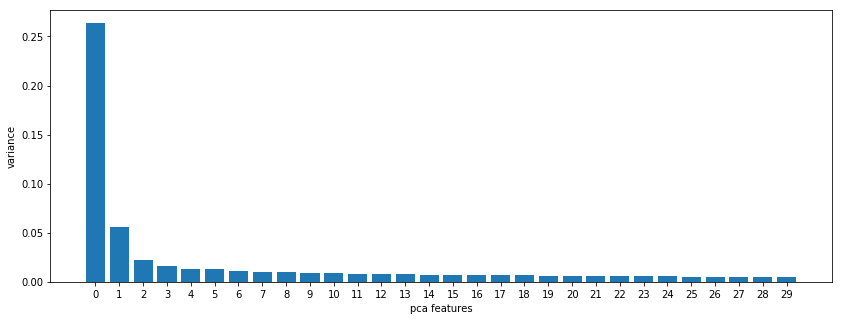

In [56]:
features = range(pca_model.n_components_)
plt.figure(figsize=(14,5))
plt.bar(features,pca_model.explained_variance_ratio_)
plt.xlabel('pca features')
plt.ylabel('variance')
plt.xticks(features)
plt.show()



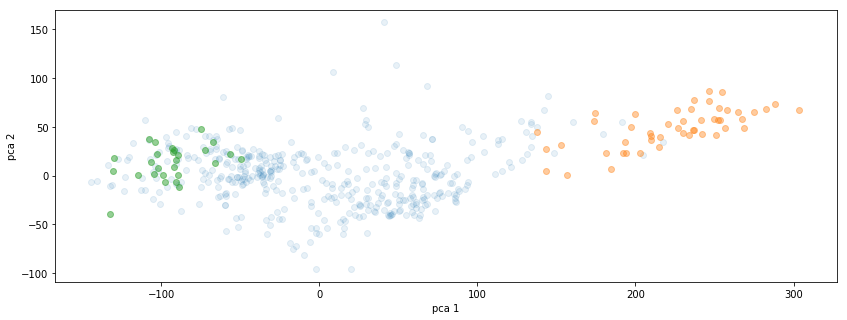

In [57]:
plt.figure(figsize=(14,5))
PCA_components = pd.DataFrame(pca_res)
plt.scatter(PCA_components[0],PCA_components[1], alpha=0.1)
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.scatter(Y_df[0],Y_df[1],alpha=0.4)
plt.scatter(Noise_df[0],Noise_df[1], alpha=0.5)

#plt.xlim((-10,10))
#plt.ylim(((-20,20)))
plt.show()

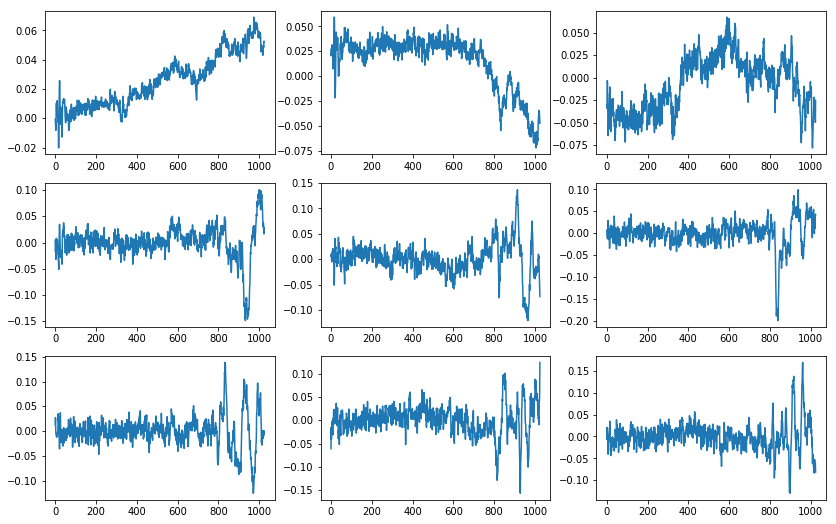

In [58]:
#print(pca_model.components_)
plt.subplots(3,3,figsize=(14,9))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.plot(pca_model.components_[i])


## Plotting the variance/uniqueness of frames compared to others 

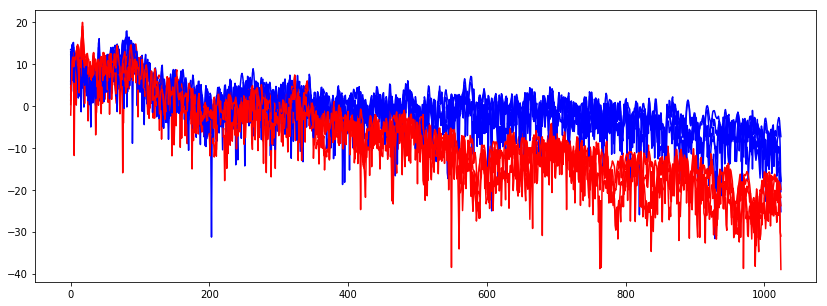

In [59]:
freqsy,psdy = signal.welch(y)
freqsn,psdn = signal.welch(noise)

#print(psdy)
plt.figure(figsize=(14,5))
for i in range(5):
    plt.plot(y_ft.T[i], color = 'blue')
    plt.plot(noise_ft.T[i], color='red')
plt.show()

In [17]:
np.shape(pca_model.components_)
print(np.shape(pca_model.explained_variance_))
pca_model.explained_variance_


(30,)


array([6169.2417  ,  691.19604 ,  320.89316 ,  222.5973  ,  194.35004 ,
        151.76718 ,  147.11182 ,  134.7507  ,  128.74692 ,  124.11554 ,
        110.92966 ,  108.62282 ,  100.70275 ,   99.03165 ,   94.598366,
         92.41278 ,   89.85456 ,   88.17651 ,   83.66706 ,   82.05879 ,
         81.339516,   78.2133  ,   75.256744,   74.8201  ,   73.77905 ,
         67.6393  ,   67.22033 ,   65.617874,   61.802505,   61.14889 ],
      dtype=float32)

In [18]:
np.shape(X_std)

(1025, 7844)

In [2]:
plt.rcParams['figure.figsize'] = [14, 6]

fig, ax1 = plt.subplots()

signif_line = [0]* len(X_std.T)
signif_line1 = [0]* len(X_std.T)

xt = np.linspace(0,total_time,len(X_std.T))
#print(xt)
#x_ft = librosa.power_to_db(abs(librosa.stft(x)))
#for i in range(len(pca_model.explained_variance_)):
for i in range(2):

    Xi= np.matmul(X_std.T,pca_model.components_[i])
    Xi = PCA_components[i]
    #print(Xi)
    signif_line+= Xi
    
for i in range(3):

    
    Xi= np.matmul(X_std.T,pca_model.components_[i])
    Xi = PCA_components[i]
    #print(Xi)
    signif_line1+= Xi

                            
#Sxx, F, time, imageAxis = ax1.specgram(x, Fs=22050)
img = librosa.display.specshow(np.array(x_ft),ax =ax1,x_axis='time',y_axis='hz')

from scipy.signal import find_peaks
peaks = find_peaks(signif_line,prominence=20,height=10)
ax2=ax1.twinx()
ax2.plot(xt,signif_line,color='blue')
ax2.plot(xt,signif_line1,color='green')

ax2.scatter(xt[peaks[0]],signif_line[peaks[0]], marker='x',s=122, c= 'black')
fig.colorbar()
#ax1.plot()
#print(len(x_ft))

NameError: name 'plt' is not defined

In [39]:
print(np.shape(peaks[0]))

(608,)


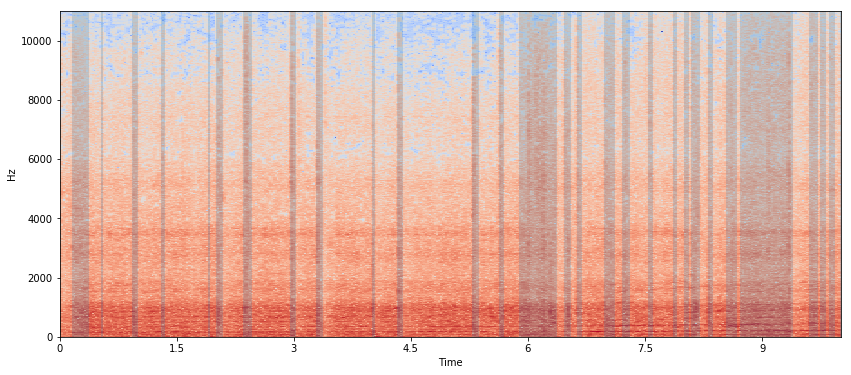

In [63]:
from matplotlib.patches import Rectangle
fig, ax1 = plt.subplots()

img = librosa.display.specshow(np.array(x_ft),ax =ax1,x_axis='time',y_axis='hz')
for t in xt[signif_line>20]:
    ax1.add_patch(Rectangle(xy=[t,0],width=xt[1]-xt[0],height=12000,alpha=0.2,fill=True))


## trying on a different piece of data


In [64]:
sr =22050
xtest= librosa.load('./data/youtube/wav/7.wav',sr=None)[0][210*sr:220*sr]
xtest_ft = librosa.power_to_db(abs(librosa.stft(xtest)))
pca = PCA(n_components=30)
mypca = pca.fit_transform(xtest_ft.T)
x_transformed = pca.transform(xtest_ft.T)
p_components = pd.DataFrame(x_transformed)

#print(p_components[0])

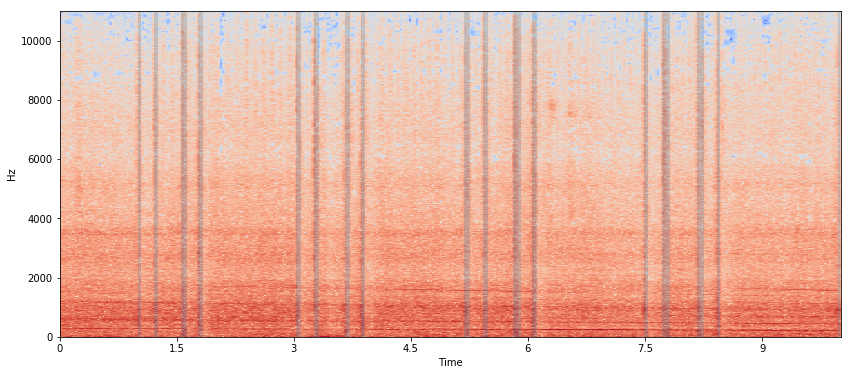

In [65]:
fig, ax1 = plt.subplots()

signif_line = [0]* len(xtest_ft.T)

xt = np.linspace(0,10,len(xtest_ft.T))
#print(xt)
#x_ft = librosa.power_to_db(abs(librosa.stft(x)))
#for i in range(len(pca_model.explained_variance_)):
for i in range(1):

    #Xi= np.matmul(xtest_ft.T,pca_model.components_[i])
    Xi = p_components[i]
    #print(Xi)
    signif_line+= Xi*pca.explained_variance_ratio_[i]


                            
#Sxx, F, time, imageAxis = ax1.specgram(x, Fs=22050)
img = librosa.display.specshow(np.array(xtest_ft),ax =ax1,x_axis='time',y_axis='hz')

for t in xt[signif_line>20]:
    ax1.add_patch(Rectangle(xy=[t,0],width=xt[1]-xt[0],height=12000,alpha=0.2,fill=True))



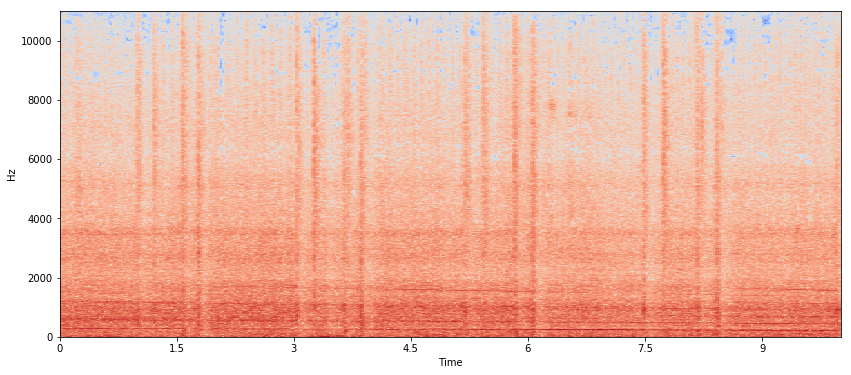

In [66]:
fig, ax1 = plt.subplots()

img = librosa.display.specshow(np.array(xtest_ft),ax =ax1,x_axis='time',y_axis='hz')


# Clustering  - 15/11/2020


This shows the actual clustering algorithm. the previous code was largely similar to the previous pca solutions. this uses the k means clustering algorithm to find 2 clusters based on the unsupervised training input. one should be noise and the other should contain the voids. 


(431,)


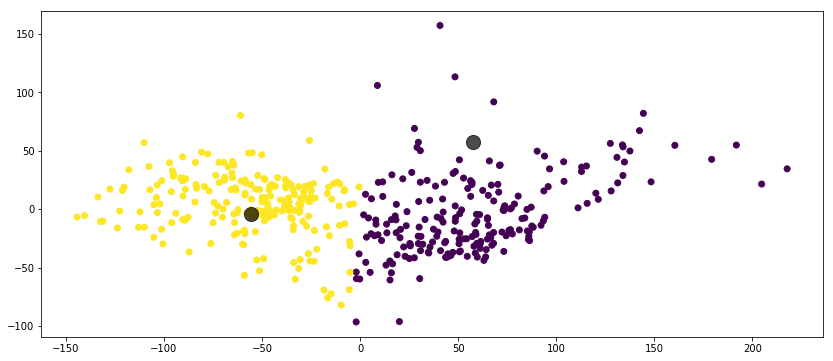

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
print(np.shape(PCA_components[0]))
X= [PCA_components[0],PCA_components[1]]
X = np.array(X).T

kmeans.fit(X)
y_kmeans=kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[0:1],c='black',s=200,alpha=0.7)

## 15/11/2020 

This did not work well, as it is not capable of considering how many samples of one type vs the other type exists in the training samples. this is finding way tooo many feature samples vs normal operation noise samples. This is difficult to sovle as the k means algorithm does not give too much flexibility. Also, it is not possible to know in advance whether the next 10 seconds of audio will contain a void or not, so it is not feasible to use this. 

In [ ]:
sr =22050
xtest= librosa.load('./data/youtube/wav/7.wav',sr=None)[0][210*sr:220*sr]
xtest_ft = librosa.power_to_db(abs(librosa.stft(xtest)))
pca = PCA(n_components=30)
mypca = pca.fit_transform(xtest_ft.T)
x_transformed = pca.transform(xtest_ft.T)
p_components = pd.DataFrame(x_transformed)
Xt= [p_components[0],p_components[1]]
Xt = np.array(Xt).T
yt_kmeans=kmeans.predict(Xt)
print 

#print(p_components[0])
for t in xt[signif_line>20]:
    ax1.add_patch(Rectangle(xy=[t,0],width=xt[1]-xt[0],height=12000,alpha=0.2,fill=True))